# Split Dataset for Model Development
A balanced training set so that the model has an equal number of cases in each class to learn. 
An imbalanced validation set to reflect the real-world situation.

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

import sklearn.model_selection as skl

## Read the Data
d = pd.read_csv('findings_data_5000.csv')
d.head(2)

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,1,Cardiomegaly|Emphysema,1,57,M,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,No Finding,2,77,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Descriptive statistics

[Text(0, 0.5, 'Number of Images with Label')]

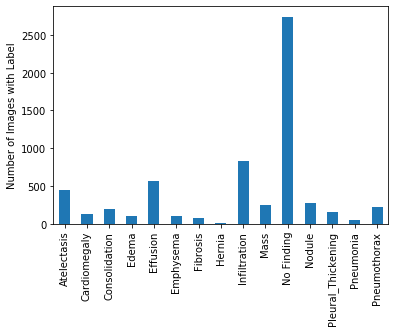

In [3]:
all_labels = np.unique(list(chain(*d['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]

ax = d[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

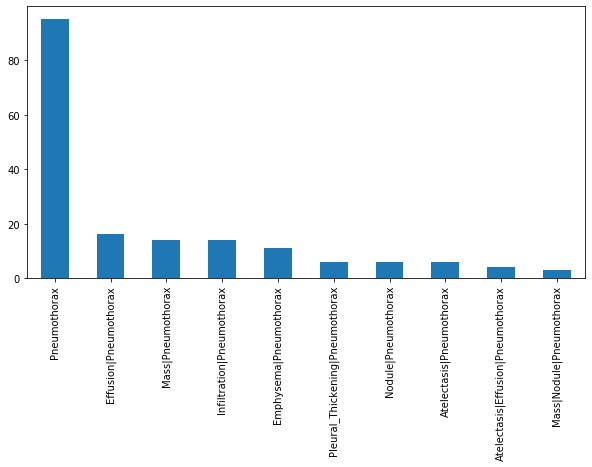

In [4]:
plt.figure(figsize=(10,5))
d[d.Pneumothorax==1]['Finding Labels'].value_counts()[0:10].plot(kind='bar')

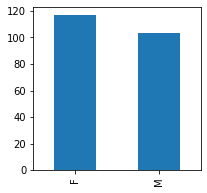

In [5]:
plt.figure(figsize=(3,3))
d[d.Pneumothorax ==1]['Patient Gender'].value_counts().plot(kind='bar')

(array([12., 18., 13., 21., 20., 47., 50., 26.,  9.,  4.]),
 array([ 7. , 14.6, 22.2, 29.8, 37.4, 45. , 52.6, 60.2, 67.8, 75.4, 83. ]),
 <a list of 10 Patch objects>)

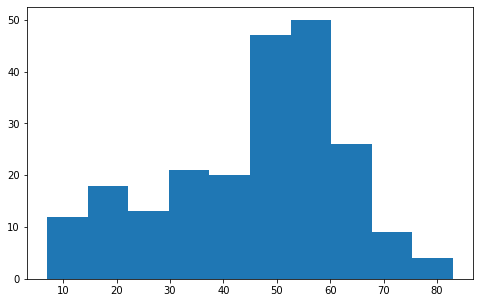

In [6]:
plt.figure(figsize=(8,5))
plt.hist(d[d.Pneumothorax==1]['Patient Age'])

## Split the Data into Train/Test Partitions
create the appropriate training and validation sets 

In [7]:
train_df, valid_df = skl.train_test_split(d, 
                                   test_size = 0.2, 
                                   stratify = d['Pneumothorax'])

train_df['Pneumothorax'].sum()/len(train_df)

0.04401100275068767

In [8]:
valid_df['Pneumothorax'].sum()/len(valid_df)

0.044


###  _Equal_ amount of positive and negative cases in Training 

In [9]:
p_inds = train_df[train_df.Pneumothorax==1].index.tolist()
np_inds = train_df[train_df.Pneumothorax==0].index.tolist()

np_sample = sample(np_inds,len(p_inds))
train_df = train_df.loc[p_inds + np_sample]

train_df['Pneumothorax'].sum()/len(train_df)

0.5

### 20% positive cases in the Test Set

In [10]:
p_inds = valid_df[valid_df.Pneumothorax==1].index.tolist()
np_inds = valid_df[valid_df.Pneumothorax==0].index.tolist()

# The following code pulls a random sample of non-pneumonia data that's 4 times as big as the pneumonia sample.
np_sample = sample(np_inds,4*len(p_inds))
valid_df = valid_df.loc[p_inds + np_sample]

valid_df['Pneumothorax'].sum()/len(valid_df)

0.2